In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

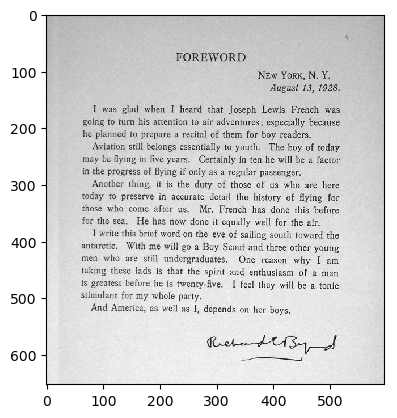

In [175]:
# image preview
img = cv2.imread('./testimg2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [177]:
AREA_THRESHOLD = 500
GAUSSIAN_BLUR_KERNEL = (3, 5) # (height, width) - odd numbers
DILATION_KERNEL_SIZE = (12, 1)  # TUNE THIS TO GET LINE GRANULARITY

# Load image, grayscale, Gaussian blur, adaptive threshold
image = cv2.imread('./testimg1.png')
image_with_boxes = cv2.imread('./testimg1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, GAUSSIAN_BLUR_KERNEL, 0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

# Dilate to combine adjacent text contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (DILATION_KERNEL_SIZE)) # generates rectangular kernel of the given size
dilate = cv2.dilate(thresh, kernel, iterations=4)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
img_list = []
for c in cnts:
    area = cv2.contourArea(c)
    if area > AREA_THRESHOLD: # only draws boxes around blobs with a certain area
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (36,255,12), 1) # wtf do these args mean
        ROI = image[y:y+h, x:x+w]
        img_list.append(ROI)
        # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        # ROI_number += 1


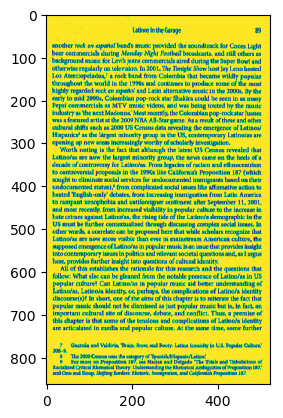

In [178]:
# preview intermediate images
plt.imshow(blur) # or thresh or dilate
plt.show()

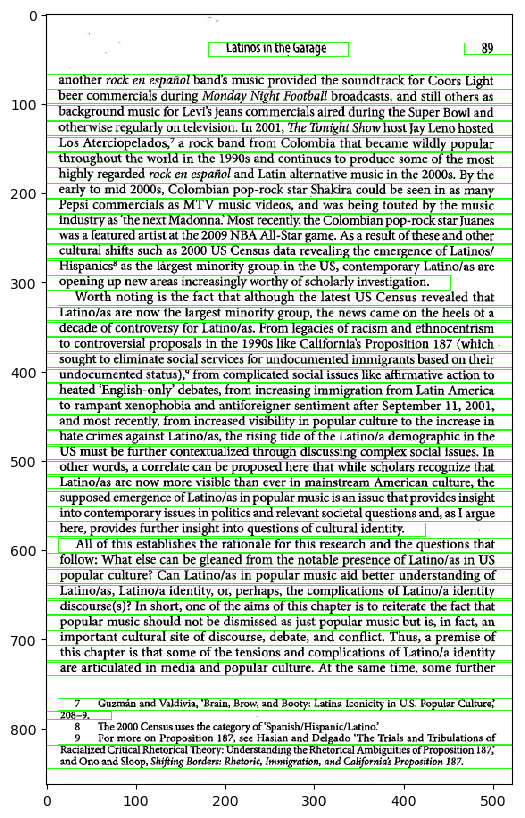

In [179]:
plt.figure(figsize=(20,10))
plt.imshow(image_with_boxes)
plt.show()

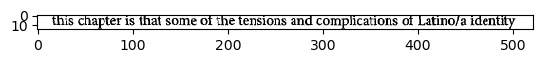

In [80]:
plt.imshow(img_list[5])
plt.show()

In [170]:
example_line = img_list[5]

LINE_AREA_THRESHOLD = 1
# LINE_GAUSSIAN_BLUR_KERNEL = (3, 3) # (height, width) - odd numbers
LINE_DILATION_KERNEL_SIZE = (2, 6)  # (width, height)

image_with_boxes = example_line.copy()
gray = cv2.cvtColor(example_line, cv2.COLOR_BGR2GRAY)

# blur = cv2.GaussianBlur(gray, LINE_GAUSSIAN_BLUR_KERNEL, 0) # don't blur it again
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

# Dilate to combine adjacent text contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, LINE_DILATION_KERNEL_SIZE) # generates rectangular kernel of the given size
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

word_list = []
for c in cnts:
    area = cv2.contourArea(c)
    # maybe add an area threshold back in
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (36,255,12), 1) # wtf do these args mean
    ROI = example_line[y:y+h, x:x+w]
    word_list.append(ROI)

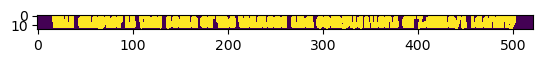

In [171]:
# preview intermediate results
plt.imshow(dilate)
plt.show()

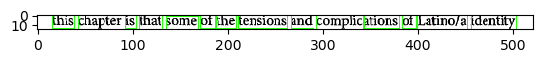

In [172]:
plt.imshow(image_with_boxes)
plt.show()

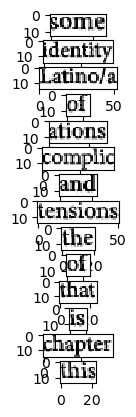

In [173]:
plt.figure()
num_rows = len(word_list)

for i, word in enumerate(word_list):
    plt.subplot(num_rows, 1, i+1)
    plt.imshow(word)
    
plt.show()